# Assignment 1

Cifar-10 classification with Convolutional Neural Networks

We were given a sample CNN notebook for MNIST (recognizing numbers) which we had to adapt for Cifar-10 (categorizing 10 different image classes). Minimal acceptable target was 75% validation accuracy while ideal target was 82% or above. We managed to hit above 87% in our final model which we deemed to be as good as it possibly could get.

Importing necessary libraries.

In [12]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import keras
from keras import layers


import numpy as np
import matplotlib.pyplot as plt

Input image size is 32x32 pixels with 3 colour RGB channels yielding total of 3072 units for our input layer.

In [3]:
# Cifar-10 images have 10 distinct classes, image input in 32x32x3
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Creating the model
First convolutional block consists of 32 filters, second of 64 filters, both 3x3 pixels each. The input is flattened from 3 dimensions to just 1 so that it can be fed into the model. Finally 50% of neurons are dropped during the training in order to help the model generalize into non-trainset data.

In [13]:
# Create the model
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

In [14]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

# Training

Model is compiled using Categorical Crossentropy as loss function and Adam as optimizer.

In [15]:
batch_size = 4
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.4542 - loss: 1.5177 - val_accuracy: 0.5620 - val_loss: 1.2485
Epoch 2/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5520 - loss: 1.2771 - val_accuracy: 0.5876 - val_loss: 1.1735
Epoch 3/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5780 - loss: 1.2044 - val_accuracy: 0.6316 - val_loss: 1.0694
Epoch 4/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5957 - loss: 1.1567 - val_accuracy: 0.6374 - val_loss: 1.0621
Epoch 5/5
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.6110 - loss: 1.1199 - val_accuracy: 0.6600 - val_loss: 0.9897


# Plotting the results

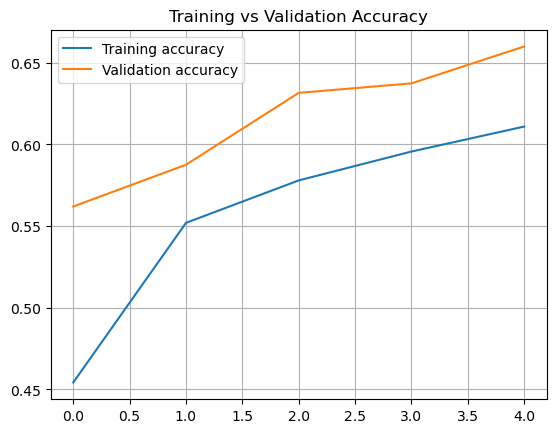

In [23]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

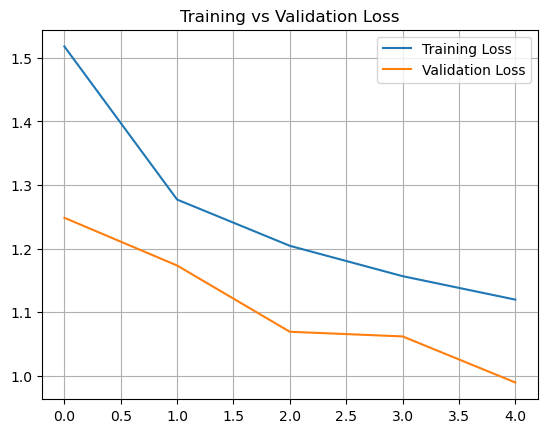

In [24]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

Results of the CNN model before introducing custom layers.

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.4268031120300293
Test accuracy: 0.8640000224113464
Final training accuracy: 0.610955536365509
Final training loss: 1.1198855638504028
Final validation accuracy: 0.6600000262260437
Final validation loss: 0.9896731376647949


# Picture recognition results

E0000 00:00:1762114744.553203   50617 util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


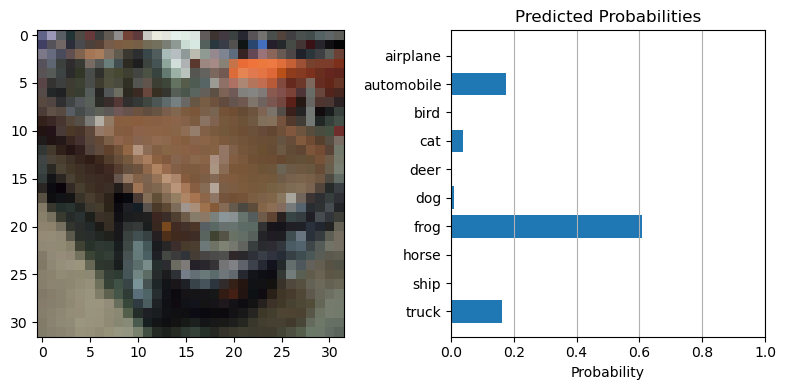

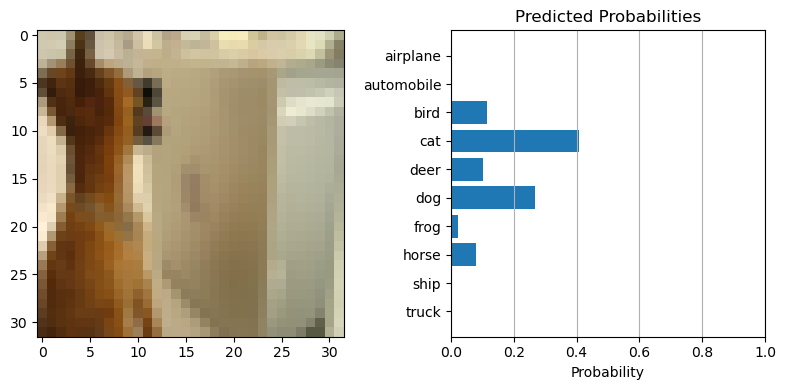

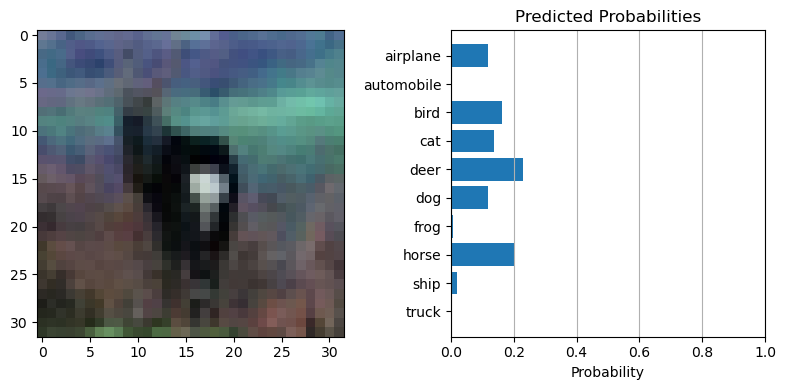

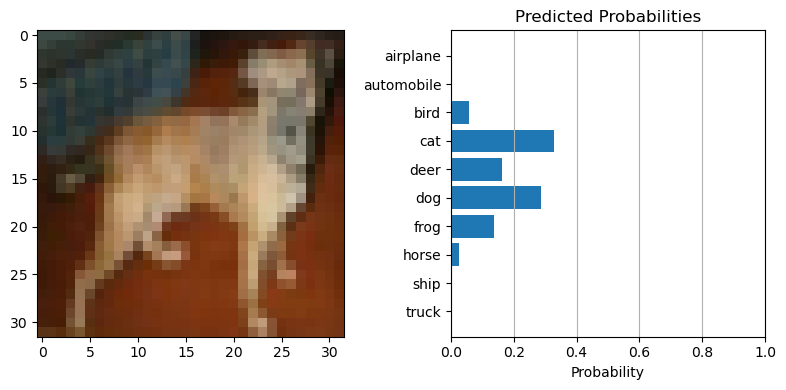

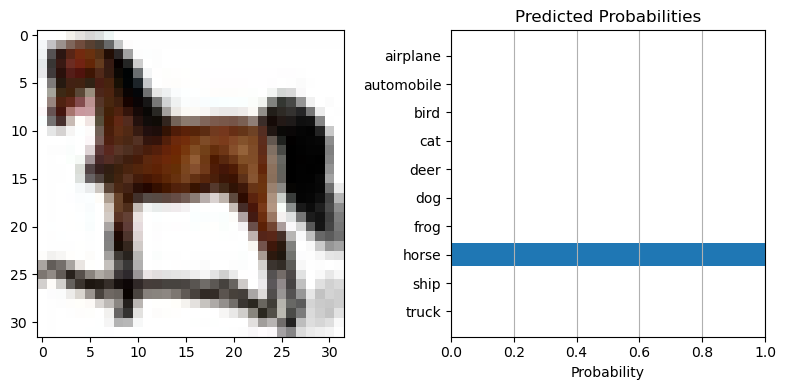

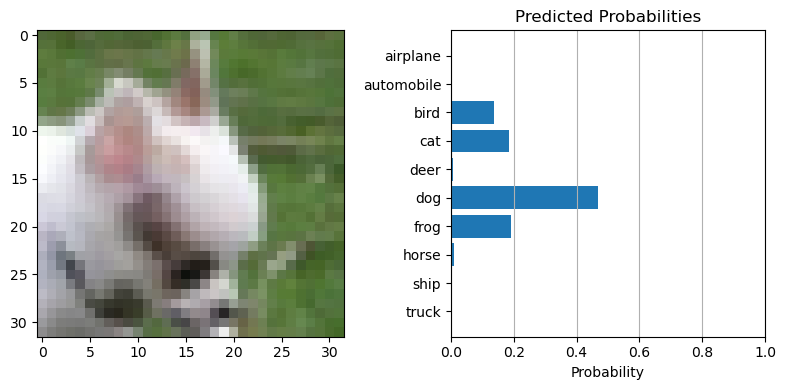

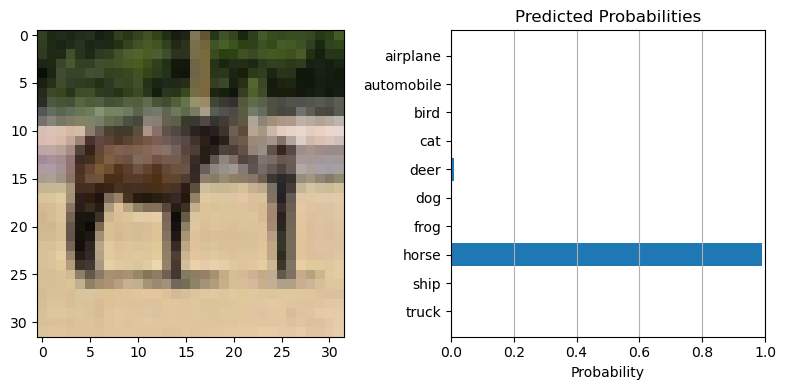

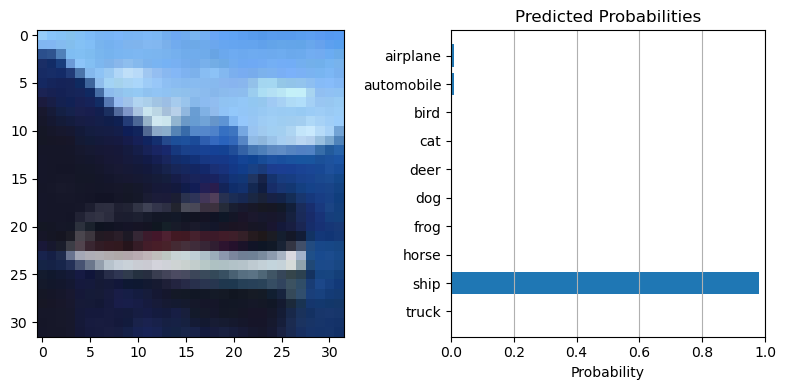

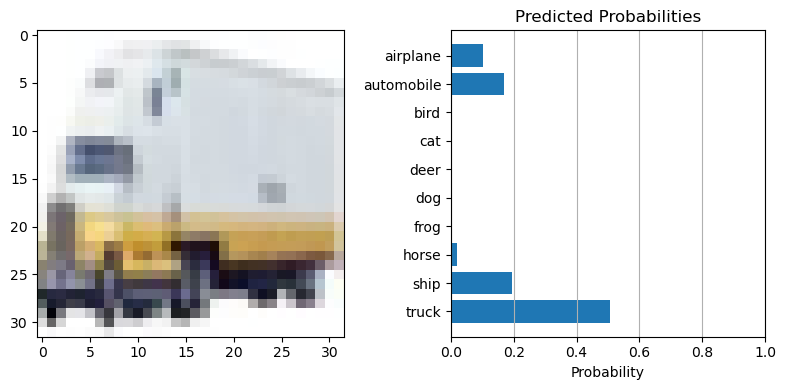

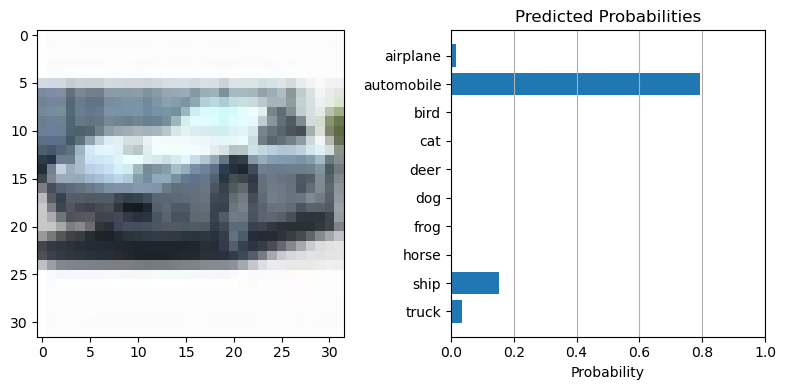

In [16]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 4))  # Increased figure height for better horizontal plot
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[start + k].numpy().flatten())  # Use barh for horizontal bars
    plt.yticks(ind, targets)  # Use yticks for vertical labels
    plt.gca().invert_yaxis()  # Invert y-axis to have class 0 at the top
    plt.xlabel("Probability")  # Label the x-axis as probability
    plt.title("Predicted Probabilities")  # Add a title to the bar plot
    plt.xlim(0, 1)  # Set x-axis limit from 0 to 1 for probabilities
    plt.grid(axis='x')  # Add grid lines for the x-axis
    plt.tight_layout()  # Adjust layout to prevent labels overlapping
    plt.show()

# Modifying the model
---
Here we start to tinker with the parameters of the model, testing adding layers, optimizers and callbacks.





In [17]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [18]:
print(K.backend())

tensorflow


Same data as above, images of 32x32x3 size.

In [19]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Add model target labels to a list
targets = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Creating the model

Our early versions used two Conv2D layers with 32 and 64 filters, followed by max pooling and dropout (0.3–0.5). Later, additional Conv2D blocks with 128 filters were added, and padding was set to "same" for better spatial retention.

We tested several configurations by adjusting the learning rate (0.0002–0.002), batch size (4–128), and patience in early stopping (2–10). Regularization techniques such as L2 weight decay, dropout, and spatial dropout were applied to reduce overfitting. Data augmentation was also experimented with but eventually removed to improve consistency.

The final model included three convolutional blocks (32, 64, 128 filters), each followed by batch normalization, ReLU, max pooling, and dropout layers, ending with a dense layer of 128 units and a softmax output of 10 classes. With the AdamW optimizer and a learning rate of 0.002, the best configuration achieved around 85% test accuracy.


The model consists of progressively larger filter layers (32 -> 64 -> 128)
1. Batch normalization speeds up and improves model's generalization abilities.
2. pooling gradually downsamples the images (i.e. fewer pizels per image -> model looks for more generic features in that image).
3. Dropping 30%/50% neurons after each layer improves generalization abilities.

In [20]:
# Create the model
inputs = keras.Input(shape=input_shape)

# ---------------
x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.3)(x)
# ---------------

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)
# ---------------

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.Conv2D(128, kernel_size=(3, 3), use_bias=False, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Dropout(0.5)(x)
# ---------------

x = layers.Flatten()(x)

x = keras.layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")


In [21]:
model.summary()


Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 552,426 (2.11 MB)

 Trainable params: 551,274 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

# Training the model

Two callbacks are added, one to reduce learning rate upon reaching plateau and second to stop the model after it stops improving. Batch size 128 was chosen as a good balance between performance and model accuracy.

In [22]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.src.callbacks import ReduceLROnPlateau

# increased batch size and epochs to make processing faster and more reliable
batch_size = 64
epochs = 250

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6, verbose=1)

# increase learning rate from 0.0001
optimizer = Adam(learning_rate=0.002)
# add early stop to auto stop processing if values are not getting better
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# change validation split to 0.2 to get better results
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4040 - loss: 1.6474 - val_accuracy: 0.5208 - val_loss: 1.3545 - learning_rate: 0.0020
Epoch 2/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5730 - loss: 1.1947 - val_accuracy: 0.6218 - val_loss: 1.0754 - learning_rate: 0.0020
Epoch 3/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6425 - loss: 1.0176 - val_accuracy: 0.5793 - val_loss: 1.1740 - learning_rate: 0.0020
Epoch 4/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6777 - loss: 0.9240 - val_accuracy: 0.7102 - val_loss: 0.8129 - learning_rate: 0.0020
Epoch 5/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7004 - loss: 0.8630 - val_accuracy: 0.7058 - val_loss: 0.8220 - learning_rate: 0.0020
Epoch 6/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7185 - loss: 0.8042 - val_accuracy: 0.7392 - val_loss: 0.7522 - learning_rate: 0.0020
Epoch 7/250
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7363 - loss: 0

KeyboardInterrupt: 

# Plotting results

Training and validation accuracy & training and validation loss. The lines converge and eventually plateau around 50-60 epocs.

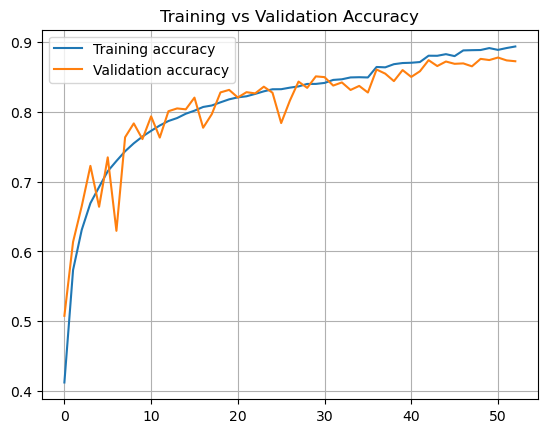

In [8]:
plt.title("Training vs Validation Accuracy")
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

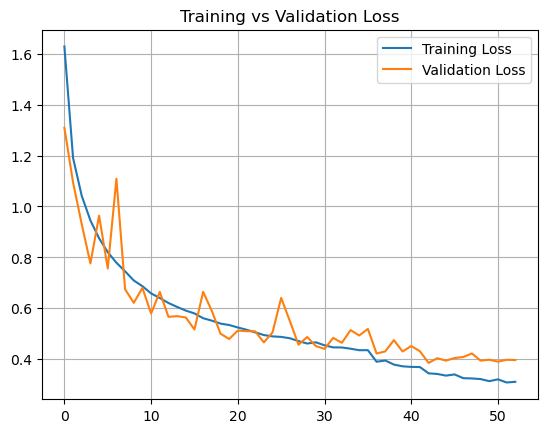

In [9]:
plt.title("Training vs Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
epoch_run = range(1, len(history.history['loss']))
plt.locator_params(axis='x', nbins=10)  # limit number of xbins to prevent numbers being on top of each others
plt.legend()
plt.grid()
plt.show()

# Evaluation metrics

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Final training accuracy:", history.history['accuracy'][-1])
print("Final training loss:", history.history['loss'][-1])

print("Final validation accuracy:", history.history['val_accuracy'][-1])
print("Final validation loss:", history.history['val_loss'][-1])

Test loss: 0.3998599648475647
Test accuracy: 0.867900013923645
Final training accuracy: 0.893975019454956
Final training loss: 0.31154313683509827
Final validation accuracy: 0.8727999925613403
Final validation loss: 0.39702391624450684


# Picture recognition results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


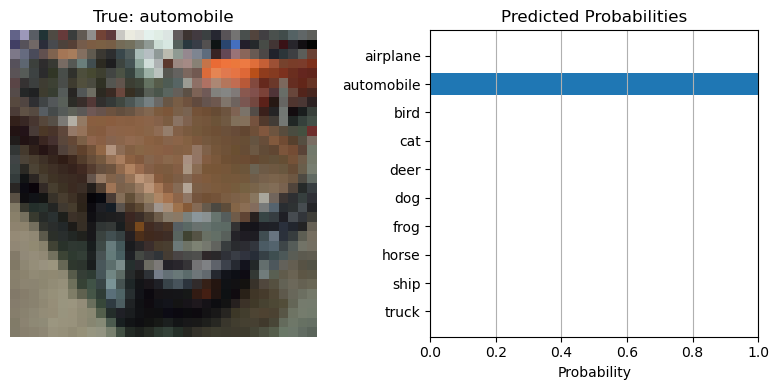

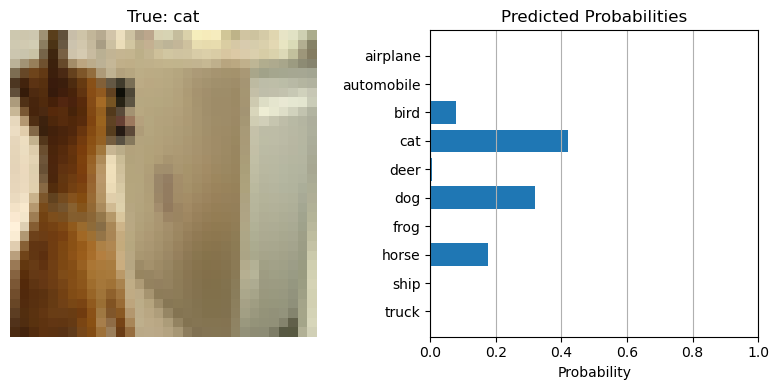

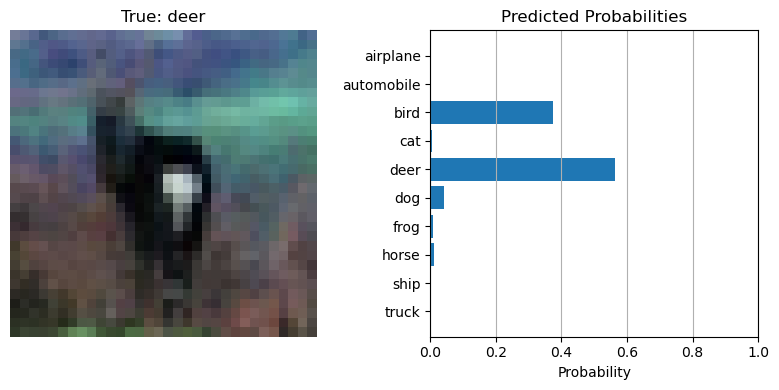

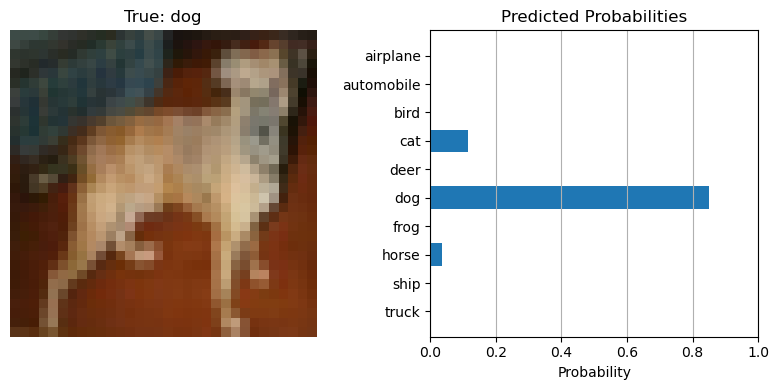

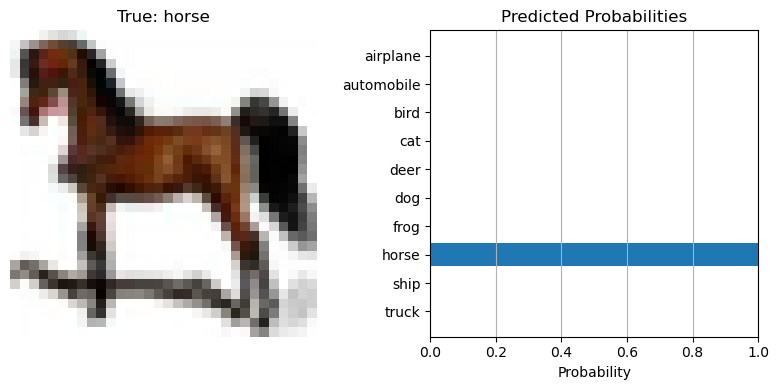

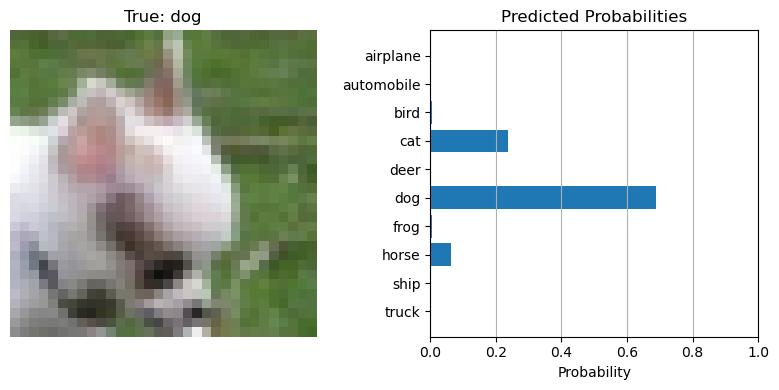

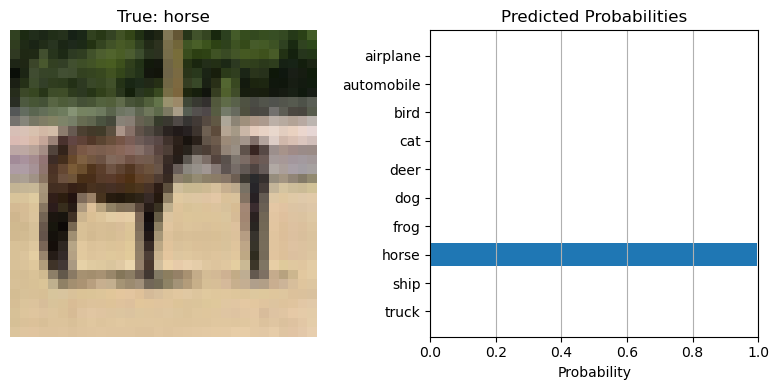

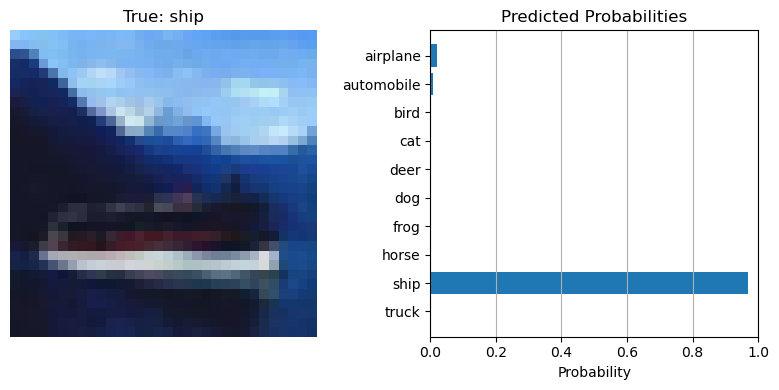

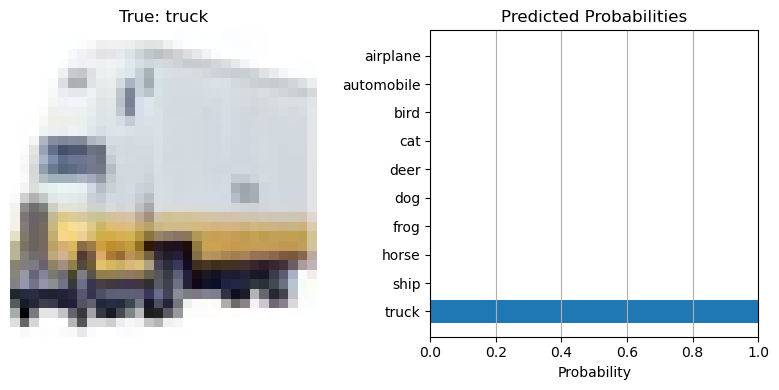

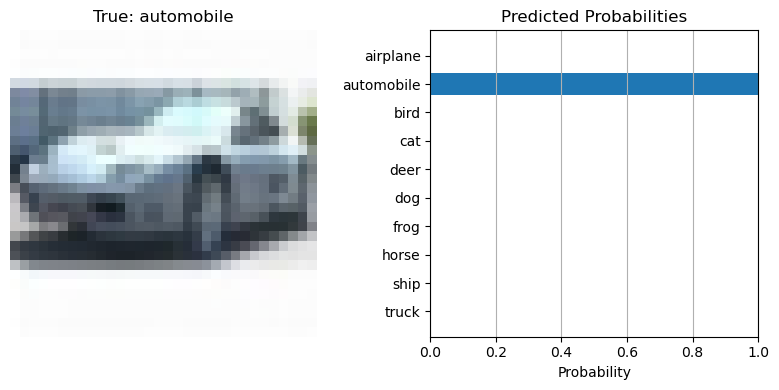

In [11]:
import numpy as np
import matplotlib.pyplot as plt

start = 2000
subset = x_test[start:start+10].astype("float32")

y = model.predict(subset, batch_size=10)

for k in range(10):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(subset[k].reshape((32, 32, 3)))
    plt.axis("off")
    plt.title(f"True: {targets[np.argmax(y[k])]}")

    ind = np.arange(len(targets))
    plt.subplot(1, 2, 2)
    plt.barh(ind, y[k].flatten())
    plt.yticks(ind, targets)
    plt.gca().invert_yaxis()
    plt.xlabel("Probability")
    plt.title("Predicted Probabilities")
    plt.xlim(0, 1)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
    plt.close('all')



In [20]:
model.save('./mnist_cnn.keras')


In [21]:
model = keras.models.load_model('mnist_cnn.keras')
